In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# This code plots emissivity and opacity values calculated using SCRAM

In [2]:
fname = './Al-MARZ2_scram_tables/Al-1mm_scram_table_noheader.txt'
data = pd.read_fwf(fname)
ni = np.loadtxt('./Al-MARZ2_scram_tables/ni.txt') # These are the values of ni, Te and E for which teh SCRAM tables were computed
Te = np.loadtxt('./Al-MARZ2_scram_tables/Te.txt')
E = np.loadtxt('./Al-MARZ2_scram_tables/E.txt')

# we need the moddle of the energy bins
print('ni [ions/cc]:', ni)
print('Te [eV]:', Te)
print('E shape:',E.shape)

ni [ions/cc]: [1.000e+16 3.162e+16 1.000e+17 3.162e+17 1.000e+18 3.162e+18 1.000e+19
 3.162e+19 1.000e+20]
Te [eV]: [ 50.    56.34  63.49  71.55  80.63  90.86 102.4  115.4  130.   146.5
 165.1  186.   209.6  236.2  266.2  300.  ]
E shape: (1200,)


In [3]:
D = np.diff(E)
Enew = E[0:-1] + D / 2
Enew.shape

(1199,)

In [4]:
# Read values of emissivity and opacity from tables

kloc = data.columns.get_loc('k(cm2)') # SCRAM has opacity cross-section we need to multipy by ion density to get [cm^-1]
jloc = data.columns.get_loc('j(W/ion/eV)')

emi = data.iloc[:,jloc:kloc-1] # read all columns for emissivity
opa = data.iloc[:,kloc:-1] # read all columns for opacity

print('Opacity shape:', opa.shape)
print('Emissivity shape', emi.shape)

# Add the ion density and temperature

opa.insert(0, "Ni(ions/cc)", data.iloc[:,0], True)
opa.insert(1, "Te(eV)", data.iloc[:,1], True)
emi.insert(0, "Ni(ions/cc)", data.iloc[:,0], True)
emi.insert(1, "Te(eV)", data.iloc[:,1], True)

print('Emissivity shape after inserting denisty & temp.', emi.shape)

Opacity shape: (144, 1199)
Emissivity shape (144, 1199)
Emissivity shape after inserting denisty & temp. (144, 1201)


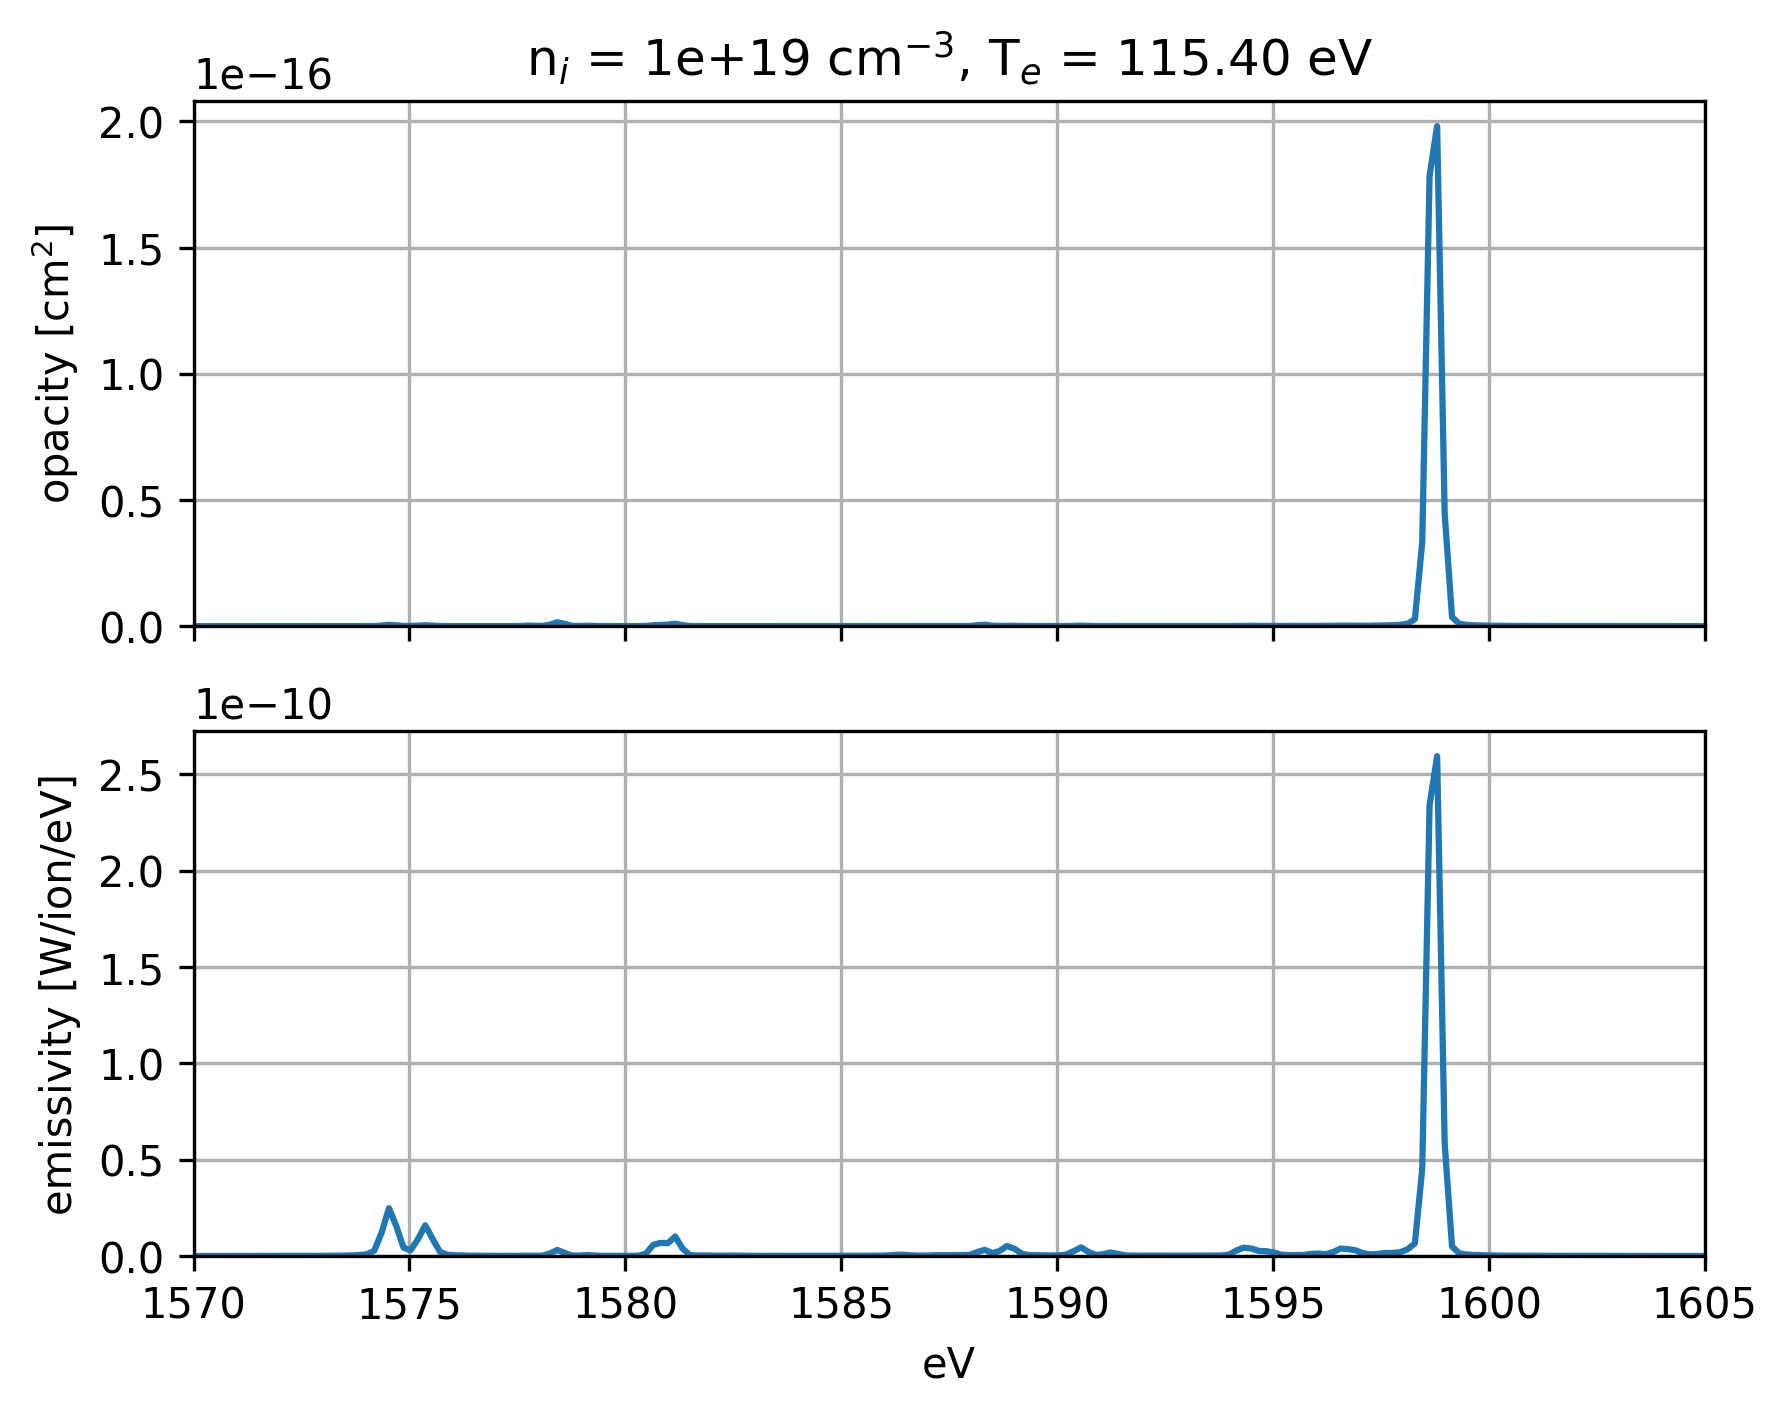

In [5]:
# show opacity and emissivity at a given temp. and density
ni_val = 1e19
Te_val = 115.4
k = opa.loc[(opa['Ni(ions/cc)'] == ni_val) & (opa['Te(eV)'] == Te_val)]
j = emi.loc[(emi['Ni(ions/cc)'] == ni_val) & (emi['Te(eV)'] == Te_val)]
k = k.to_numpy()[0][2:]; 
j = j.to_numpy()[0][2:]; 

fig, axs = plt.subplots(2,1,figsize=(6.5,5),dpi=300,sharex=True)
axs[0].plot(Enew,k)
axs[1].plot(Enew,j)

for ii in range(axs.shape[0]):
    axs[ii].grid()
    axs[ii].set_ylim(ymin=0)
    axs[ii].set_xlim([1570,1605])

axs[1].set_xlabel('eV')
axs[0].set_ylabel('opacity [cm$^2$]')
axs[1].set_ylabel('emissivity [W/ion/eV]')
axs[0].set_title('n$_i$ = %1.3g cm$^{-3}$, T$_e$ = %1.2f eV' % (ni_val,Te_val))
plt.show()




In [8]:
# Convert opacity to [cm^-1] and emissivity to [W/m^3/eV]
mp =  1.6726e-24 # [g], proton mass
rho = 27 * mp * opa.iloc[:,0] # g / cm^-3
V = 0.1**3 # cm^-3, volume of cell
for ii in range(2,opa.shape[1]):
    opa.iloc[:,ii] = opa.iloc[:,ii] / (27 * mp) # cm^2/g
    opa.iloc[:,ii] = opa.iloc[:,ii] * rho # cm^-1

for ii in range(2,emi.shape[1]):
    emi.iloc[:,ii] = emi.iloc[:,ii] * rho / (27 * mp)  # W/cm^3/eV
    
    
    
# save as np arrays
opa = opa.to_numpy(); 
emi = emi.to_numpy()
values = opa[:,0:2]
opa = opa[:,2:]
emi = emi[:,2:]


In [ ]:
# Export the new tables

np.save('./Al-MARZ2_scram_tables/E.npy',Enew)
np.save('./Al-MARZ2_scram_tables/emi_scram.npy',emi)
np.save('./Al-MARZ2_scram_tables/opa_scram.npy',opa)
np.save('./Al-MARZ2_scram_tables/values_scram.npy',values)

In [27]:
# get Zbar

zloc = data.columns.get_loc('zbar') # 


zbar = data.iloc[:,zloc] # read zbar
zbar = zbar.to_numpy()


print('zbar shape:', zbar.shape)

zbar = np.column_stack([data.iloc[:,0],data.iloc[:,1],zbar])

print('zbar shape:', zbar.shape)

ni_val = 3.162e+18
Te_val = 63.49

idx = np.argwhere((zbar[:,0] == ni_val) & (zbar[:,1] == Te_val))

print(zbar[idx[0]-1,:])




zbar shape: (144,)
zbar shape: (144, 3)
[[3.162e+18 5.634e+01 1.031e+01]]


In [24]:
ni

array([1.000e+16, 3.162e+16, 1.000e+17, 3.162e+17, 1.000e+18, 3.162e+18,
       1.000e+19, 3.162e+19, 1.000e+20])